<a href="https://colab.research.google.com/github/ChiNonsoHenry16/ChiNonsoHenry16/blob/main/LSTM_on_HIV_Testing_Data_from_Nigeria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Title: Artificial-Intelligence-based Predictions of HIV Prevalence in Nigeriathrough Testing among Adolescents and Young Adults (AYA). The work was presented at the The 24th International AIDS Conference, 2022.

URL - https://www.researchgate.net/publication/362017593_Artificial-Intelligence-based_Predictions_of_HIV_Prevalence_in_Nigeria_through_Testing_among_Adolescents_and_Young_Adults [accessed May 14 2025]


Data Used:
• 2016-2017 survey results of 37 Nigerian states
• AYAs aged 15-24 years
• Outputs – HIV prevalence gottenfrom testing information

Methods & Evaluation Metrics:
• Long Short Term Memory model - a kind of Recurrent NeuralNetwork (RNN)
• Vanilla and Stacked LSTMs
• Tuning hyper-parameters(layers, epochs, activationfunctions, and optimizers).• Evaluation metrics (MSE, RMSEand MAE)


In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras import metrics

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
#Upload files to colab
from google.colab import files
uploaded = files.upload()

Saving HIV Testing in Nigeria.csv to HIV Testing in Nigeria.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['HIV Testing in Nigeria.csv']))

In [ ]:
df.head()

,States,Ever tested for HIV,Recently tested for HIV,HIV prevalence rate
0,FCT Abuja,47.3,28.8,1.6
1,Abia,19.6,10.3,2.1
2,Adamawa,25.8,19.5,1.2
3,Akwa Ibom,41.3,25.5,5.5
4,Anambra,29.3,11.4,2.4


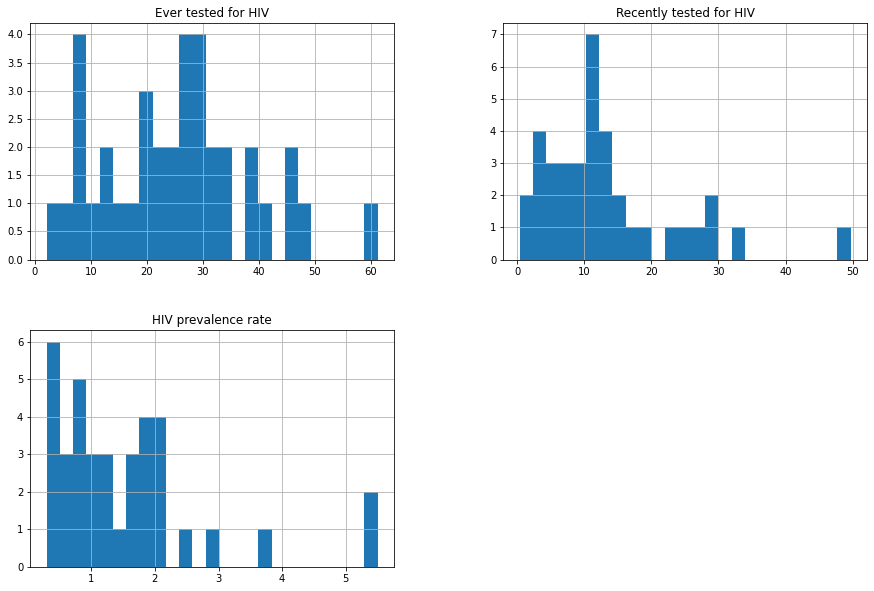

In [ ]:
df.hist(bins=25,figsize=(15,10))
# display histogram
plt.show()

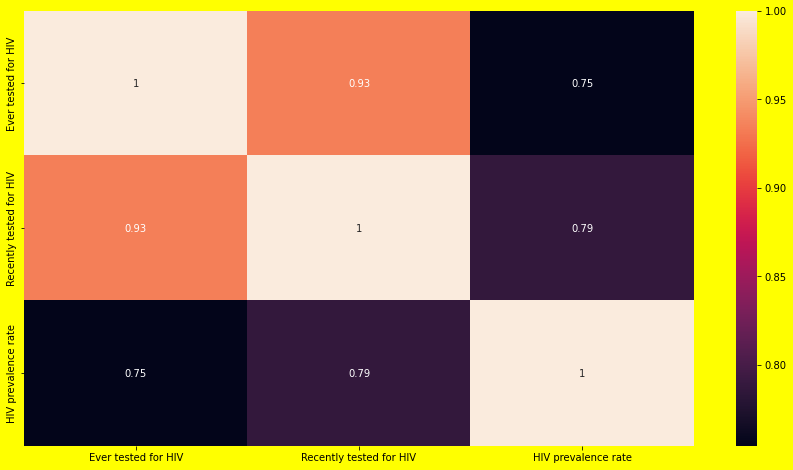

In [ ]:
# import seaborn
import seaborn as sb

# ploting heatmap
plt.figure(figsize=[15,8],facecolor='yellow')
sb.heatmap(df.corr(),annot=True)

In [ ]:
df.corr()

,Ever tested for HIV,Recently tested for HIV,HIV prevalence rate
Ever tested for HIV,1.000000,0.934605,0.754345
Recently tested for HIV,0.934605,1.000000,0.787005
HIV prevalence rate,0.754345,0.787005,1.000000


In [ ]:
Y = np.array([df.iloc[:,3]])

In [ ]:
X1 = np.array([df.iloc[:,2]])
X2 = np.array([df.iloc[:,1]])

In [ ]:
X = np.concatenate([X1,X2],axis=0)
X = np.transpose(X)

In [ ]:
Y = np.transpose(Y)

In [ ]:
sc= MinMaxScaler()
sc.fit(X)
X=sc.transform(X)

sc1= MinMaxScaler()
sc1.fit(Y)
Y=sc1.transform(Y)

In [ ]:
X = np.reshape(X,(X.shape[0],1,X.shape[1]))

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3)

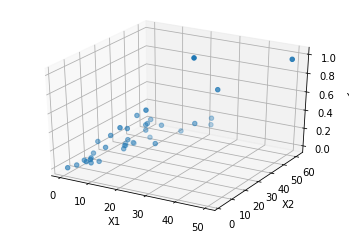

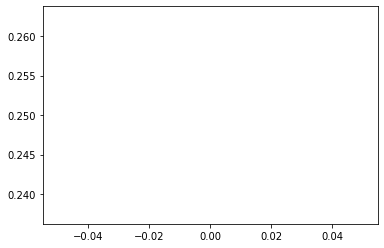

In [ ]:
fig = plt.figure(1)
ax = fig.add_subplot(111,projection='3d')

ax.scatter(X1,X2,Y,marker= 'o')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

plt.plot(Y[0,:])
plt.show()

In [ ]:
model = Sequential()

model.add(LSTM(600,activation='tanh',input_shape=(1,2), recurrent_activation='hard_sigmoid'))

model.add(Dense(1))

model.compile(loss= 'mean_squared_error',optimizer= 'adam',metrics=[metrics.mae])

model.fit(X_train,Y_train,epochs=1500,batch_size=100, verbose= 2)

predict =model.predict(X_test)

Epoch 1/1500
1/1 - 6s - loss: 0.1510 - mean_absolute_error: 0.2884 - 6s/epoch - 6s/step
Epoch 2/1500
1/1 - 0s - loss: 0.1405 - mean_absolute_error: 0.2738 - 30ms/epoch - 30ms/step
Epoch 3/1500
1/1 - 0s - loss: 0.1305 - mean_absolute_error: 0.2592 - 44ms/epoch - 44ms/step
Epoch 4/1500
1/1 - 0s - loss: 0.1211 - mean_absolute_error: 0.2463 - 37ms/epoch - 37ms/step
Epoch 5/1500
1/1 - 0s - loss: 0.1121 - mean_absolute_error: 0.2334 - 38ms/epoch - 38ms/step
Epoch 6/1500
1/1 - 0s - loss: 0.1036 - mean_absolute_error: 0.2213 - 61ms/epoch - 61ms/step
Epoch 7/1500
1/1 - 0s - loss: 0.0956 - mean_absolute_error: 0.2092 - 45ms/epoch - 45ms/step
Epoch 8/1500
1/1 - 0s - loss: 0.0882 - mean_absolute_error: 0.1974 - 46ms/epoch - 46ms/step
Epoch 9/1500
1/1 - 0s - loss: 0.0812 - mean_absolute_error: 0.1872 - 49ms/epoch - 49ms/step
Epoch 10/1500
1/1 - 0s - loss: 0.0747 - mean_absolute_error: 0.1779 - 43ms/epoch - 43ms/step
Epoch 11/1500
1/1 - 0s - loss: 0.0687 - mean_absolute_error: 0.1704 - 34ms/epoch - 

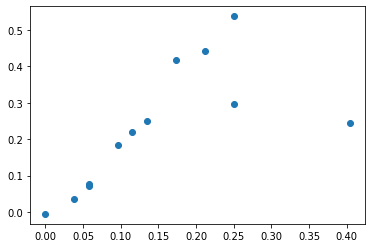

<Figure size 432x288 with 0 Axes>

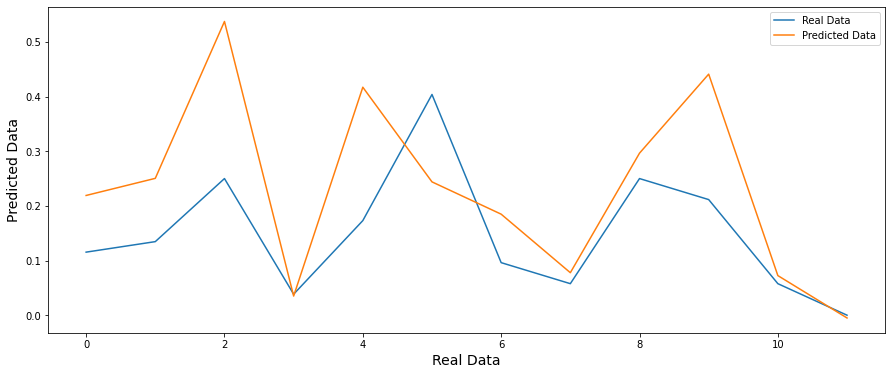

In [ ]:
plt.figure(2)
plt.scatter(Y_test,predict)
plt.show(block=False)

plt.figure(3)
plt.figure(figsize=(15,6))
Real=plt.plot(Y_test)
Predict = plt.plot(predict)
plt.xlabel('Real Data',fontsize=14)
plt.ylabel('Predicted Data',fontsize=14)
plt.legend(["Real Data","Predicted Data"])
plt.show()

**The MFE didnt run and I dont know why**

In [ ]:
mfe = np.round(np.mean(np.abs(X_test[‘df’]-y_avg[‘df’])),2)
mae


In [ ]:
model = Sequential()

model.add(LSTM(800,activation='relu',input_shape=(1,2), recurrent_activation='hard_sigmoid'))

model.add(Dense(1))

model.compile(loss= 'mean_squared_error',optimizer= 'adam',metrics=[metrics.mae])

model.fit(X_train,Y_train,epochs=2000,batch_size=200, verbose= 2)

predict =model.predict(X_test)

Epoch 1/2000
1/1 - 4s - loss: 0.1473 - mean_absolute_error: 0.2848 - 4s/epoch - 4s/step
Epoch 2/2000
1/1 - 0s - loss: 0.1408 - mean_absolute_error: 0.2755 - 102ms/epoch - 102ms/step
Epoch 3/2000
1/1 - 0s - loss: 0.1347 - mean_absolute_error: 0.2666 - 88ms/epoch - 88ms/step
Epoch 4/2000
1/1 - 0s - loss: 0.1289 - mean_absolute_error: 0.2580 - 94ms/epoch - 94ms/step
Epoch 5/2000
1/1 - 0s - loss: 0.1234 - mean_absolute_error: 0.2504 - 85ms/epoch - 85ms/step
Epoch 6/2000
1/1 - 0s - loss: 0.1182 - mean_absolute_error: 0.2431 - 94ms/epoch - 94ms/step
Epoch 7/2000
1/1 - 0s - loss: 0.1132 - mean_absolute_error: 0.2359 - 102ms/epoch - 102ms/step
Epoch 8/2000
1/1 - 0s - loss: 0.1084 - mean_absolute_error: 0.2288 - 104ms/epoch - 104ms/step
Epoch 9/2000
1/1 - 0s - loss: 0.1037 - mean_absolute_error: 0.2220 - 90ms/epoch - 90ms/step
Epoch 10/2000
1/1 - 0s - loss: 0.0992 - mean_absolute_error: 0.2154 - 85ms/epoch - 85ms/step
Epoch 11/2000
1/1 - 0s - loss: 0.0949 - mean_absolute_error: 0.2087 - 95ms/ep

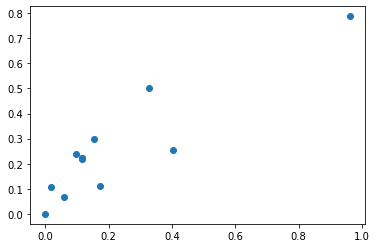

<Figure size 432x288 with 0 Axes>

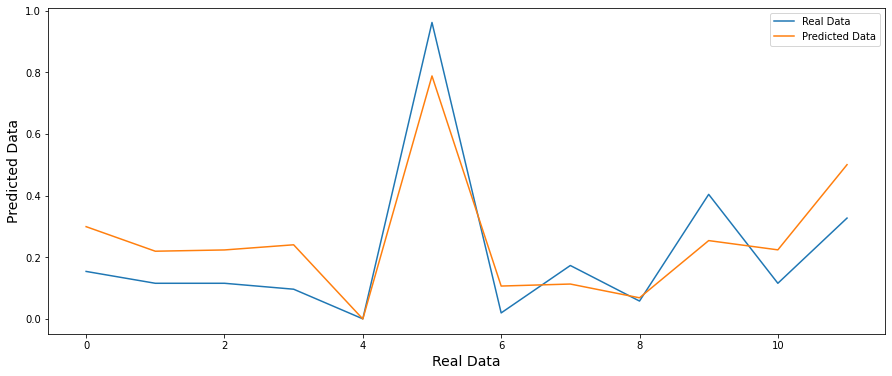

In [ ]:
plt.figure(2)
plt.scatter(Y_test,predict)
plt.show(block=False)

plt.figure(3)
plt.figure(figsize=(15,6))
Real=plt.plot(Y_test)
Predict = plt.plot(predict)
plt.xlabel('Real Data',fontsize=14)
plt.ylabel('Predicted Data',fontsize=14)
plt.legend(["Real Data","Predicted Data"])
plt.show()

In [ ]:
model = Sequential()

model.add(LSTM(1000,activation='relu',input_shape=(1,2), recurrent_activation='hard_sigmoid'))

model.add(Dense(1))

model.compile(loss= 'mean_squared_error',optimizer= 'rmsprop',metrics=[metrics.mae])

model.fit(X_train,Y_train,epochs=3000,batch_size=500, verbose= 2)

predict =model.predict(X_test)

Streaming output truncated to the last 5000 lines.
Epoch 501/3000
1/1 - 0s - loss: 0.0234 - mean_absolute_error: 0.1031 - 42ms/epoch - 42ms/step
Epoch 502/3000
1/1 - 0s - loss: 0.0234 - mean_absolute_error: 0.1006 - 40ms/epoch - 40ms/step
Epoch 503/3000
1/1 - 0s - loss: 0.0234 - mean_absolute_error: 0.1031 - 38ms/epoch - 38ms/step
Epoch 504/3000
1/1 - 0s - loss: 0.0234 - mean_absolute_error: 0.1007 - 36ms/epoch - 36ms/step
Epoch 505/3000
1/1 - 0s - loss: 0.0234 - mean_absolute_error: 0.1030 - 37ms/epoch - 37ms/step
Epoch 506/3000
1/1 - 0s - loss: 0.0234 - mean_absolute_error: 0.1007 - 37ms/epoch - 37ms/step
Epoch 507/3000
1/1 - 0s - loss: 0.0234 - mean_absolute_error: 0.1030 - 40ms/epoch - 40ms/step
Epoch 508/3000
1/1 - 0s - loss: 0.0233 - mean_absolute_error: 0.1007 - 38ms/epoch - 38ms/step
Epoch 509/3000
1/1 - 0s - loss: 0.0233 - mean_absolute_error: 0.1030 - 37ms/epoch - 37ms/step
Epoch 510/3000
1/1 - 0s - loss: 0.0233 - mean_absolute_error: 0.1007 - 38ms/epoch - 38ms/step
Epoch 511

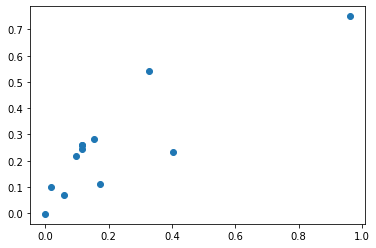

<Figure size 432x288 with 0 Axes>

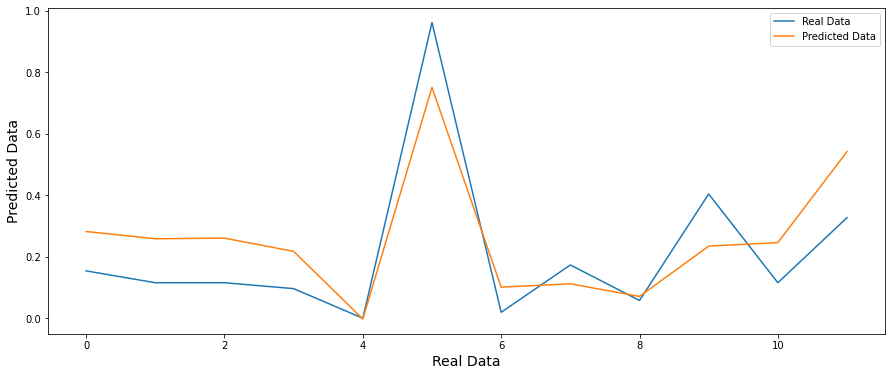

In [ ]:
plt.figure(2)
plt.scatter(Y_test,predict)
plt.show(block=False)

plt.figure(3)
plt.figure(figsize=(15,6))
Real=plt.plot(Y_test)
Predict = plt.plot(predict)
plt.xlabel('Real Data',fontsize=14)
plt.ylabel('Predicted Data',fontsize=14)
plt.legend(["Real Data","Predicted Data"])
plt.show()

In [ ]:
model = Sequential()
model.add(LSTM(500, activation='relu', return_sequences=True, input_shape=(1, 2), recurrent_activation='hard_sigmoid'))
model.add(LSTM(500, activation='relu'))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error',optimizer= 'rmsprop',metrics=[metrics.mae])

model.fit(X_train,Y_train,epochs=3000,batch_size=500, verbose= 2)

predict =model.predict(X_test)

Streaming output truncated to the last 5000 lines.
Epoch 501/3000
1/1 - 0s - loss: 0.0232 - mean_absolute_error: 0.0990 - 40ms/epoch - 40ms/step
Epoch 502/3000
1/1 - 0s - loss: 0.0232 - mean_absolute_error: 0.0984 - 24ms/epoch - 24ms/step
Epoch 503/3000
1/1 - 0s - loss: 0.0231 - mean_absolute_error: 0.0989 - 26ms/epoch - 26ms/step
Epoch 504/3000
1/1 - 0s - loss: 0.0231 - mean_absolute_error: 0.0983 - 28ms/epoch - 28ms/step
Epoch 505/3000
1/1 - 0s - loss: 0.0231 - mean_absolute_error: 0.0984 - 29ms/epoch - 29ms/step
Epoch 506/3000
1/1 - 0s - loss: 0.0231 - mean_absolute_error: 0.0981 - 31ms/epoch - 31ms/step
Epoch 507/3000
1/1 - 0s - loss: 0.0230 - mean_absolute_error: 0.0980 - 32ms/epoch - 32ms/step
Epoch 508/3000
1/1 - 0s - loss: 0.0231 - mean_absolute_error: 0.0981 - 32ms/epoch - 32ms/step
Epoch 509/3000
1/1 - 0s - loss: 0.0231 - mean_absolute_error: 0.0983 - 30ms/epoch - 30ms/step
Epoch 510/3000
1/1 - 0s - loss: 0.0231 - mean_absolute_error: 0.0983 - 30ms/epoch - 30ms/step
Epoch 511

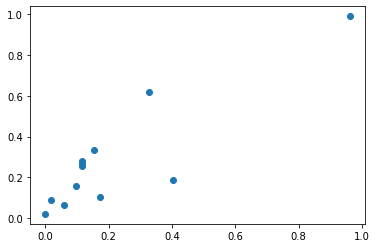

<Figure size 432x288 with 0 Axes>

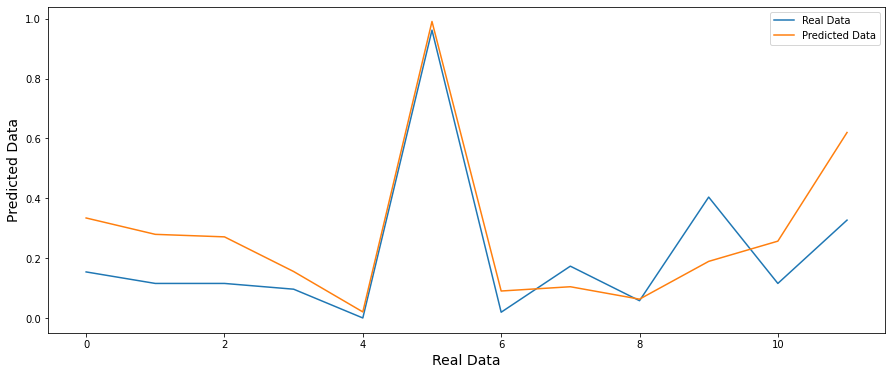

In [ ]:
plt.figure(2)
plt.scatter(Y_test,predict)
plt.show(block=False)

plt.figure(3)
plt.figure(figsize=(15,6))
Real=plt.plot(Y_test)
Predict = plt.plot(predict)
plt.xlabel('Real Data',fontsize=14)
plt.ylabel('Predicted Data',fontsize=14)
plt.legend(["Real Data","Predicted Data"])
plt.show()

In [ ]:
model = Sequential()
model.add(LSTM(512, activation='relu', return_sequences=True, input_shape=(1, 2), recurrent_activation='hard_sigmoid'))
model.add(LSTM(512, activation='relu'))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error',optimizer= 'rmsprop',metrics=[metrics.mae])

model.fit(X_train,Y_train,epochs=4000,batch_size=1000, verbose= 2)

predict =model.predict(X_test)

Streaming output truncated to the last 5000 lines.
Epoch 1501/4000
1/1 - 0s - loss: 0.0213 - mean_absolute_error: 0.0939 - 45ms/epoch - 45ms/step
Epoch 1502/4000
1/1 - 0s - loss: 0.0213 - mean_absolute_error: 0.0949 - 49ms/epoch - 49ms/step
Epoch 1503/4000
1/1 - 0s - loss: 0.0214 - mean_absolute_error: 0.0934 - 52ms/epoch - 52ms/step
Epoch 1504/4000
1/1 - 0s - loss: 0.0214 - mean_absolute_error: 0.0951 - 41ms/epoch - 41ms/step
Epoch 1505/4000
1/1 - 0s - loss: 0.0215 - mean_absolute_error: 0.0938 - 48ms/epoch - 48ms/step
Epoch 1506/4000
1/1 - 0s - loss: 0.0216 - mean_absolute_error: 0.0961 - 40ms/epoch - 40ms/step
Epoch 1507/4000
1/1 - 0s - loss: 0.0217 - mean_absolute_error: 0.0940 - 48ms/epoch - 48ms/step
Epoch 1508/4000
1/1 - 0s - loss: 0.0215 - mean_absolute_error: 0.0960 - 49ms/epoch - 49ms/step
Epoch 1509/4000
1/1 - 0s - loss: 0.0217 - mean_absolute_error: 0.0937 - 47ms/epoch - 47ms/step
Epoch 1510/4000
1/1 - 0s - loss: 0.0215 - mean_absolute_error: 0.0957 - 42ms/epoch - 42ms/step

In [ ]:
model.build()

In [ ]:
model.summary()


Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 1, 512)            1054720   
                                                                 
 lstm_31 (LSTM)              (None, 512)               2099200   
                                                                 
Total params: 3,153,920
Trainable params: 3,153,920
Non-trainable params: 0
_________________________________________________________________


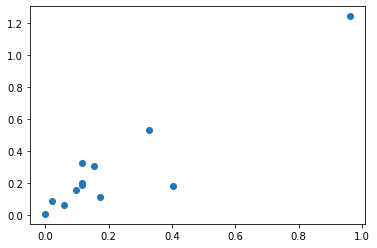

<Figure size 432x288 with 0 Axes>

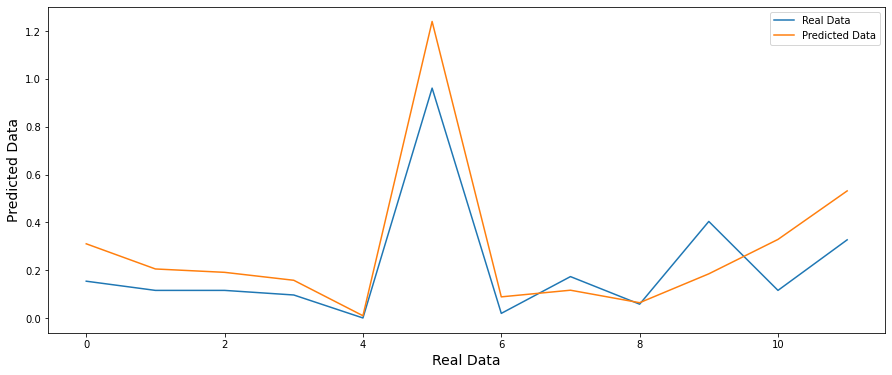

In [ ]:
plt.figure(2)
plt.scatter(Y_test,predict)
plt.show(block=False)

plt.figure(3)
plt.figure(figsize=(15,6))
Real=plt.plot(Y_test)
Predict = plt.plot(predict)
plt.xlabel('Real Data',fontsize=14)
plt.ylabel('Predicted Data',fontsize=14)
plt.legend(["Real Data","Predicted Data"])
plt.show()

Adding a third layer of 512 gives an error saying

"Input 0 of layer "lstm_29" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 512)"



In [ ]:
model = Sequential()
model.add(LSTM(512, activation='relu', return_sequences=True, input_shape=(1, 2), recurrent_activation='hard_sigmoid'))
model.add(LSTM(512, activation='relu'))
model.add(LSTM(512, activation='relu'))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error',optimizer= 'rmsprop',metrics=[metrics.mae])

model.fit(X_train,Y_train,epochs=3000,batch_size=500, verbose= 2)

predict =model.predict(X_test)

In [ ]:
model = Sequential()
model.add(LSTM(512, activation='relu', return_sequences=True, input_shape=(1, 2), recurrent_activation='hard_sigmoid'))
model.add(LSTM(512, activation='relu'))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error',optimizer= 'rmsprop',metrics=[metrics.mape])

model.fit(X_train,Y_train,epochs=400,batch_size=100, verbose= 2)

predict =model.predict(X_test)

Epoch 1/400
1/1 - 4s - loss: 0.1459 - mean_absolute_percentage_error: 95.7827 - 4s/epoch - 4s/step
Epoch 2/400
1/1 - 0s - loss: 0.1321 - mean_absolute_percentage_error: 508272.4688 - 53ms/epoch - 53ms/step
Epoch 3/400
1/1 - 0s - loss: 0.1192 - mean_absolute_percentage_error: 1028830.1875 - 60ms/epoch - 60ms/step
Epoch 4/400
1/1 - 0s - loss: 0.1052 - mean_absolute_percentage_error: 1620780.1250 - 59ms/epoch - 59ms/step
Epoch 5/400
1/1 - 0s - loss: 0.0910 - mean_absolute_percentage_error: 2262570.0000 - 60ms/epoch - 60ms/step
Epoch 6/400
1/1 - 0s - loss: 0.0773 - mean_absolute_percentage_error: 2947322.2500 - 61ms/epoch - 61ms/step
Epoch 7/400
1/1 - 0s - loss: 0.0649 - mean_absolute_percentage_error: 3653975.2500 - 68ms/epoch - 68ms/step
Epoch 8/400
1/1 - 0s - loss: 0.0545 - mean_absolute_percentage_error: 4351272.5000 - 57ms/epoch - 57ms/step
Epoch 9/400
1/1 - 0s - loss: 0.0466 - mean_absolute_percentage_error: 4997640.5000 - 64ms/epoch - 64ms/step
Epoch 10/400
1/1 - 0s - loss: 0.0412 -